In [43]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3]))
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3]))
input_shape = x_train.shape[1:]


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(500, activation='relu',input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 500)               392500    
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3s 42us/step - loss: 0.3206 - acc: 0.9023 - val_loss: 0.1273 - val_acc: 0.9593
Epoch 2/12
60000/60000 [==============================] - 2s 37us/step - loss: 0.1372 - acc: 0.9591 - val_loss: 0.0889 - val_acc: 0.9731
Epoch 3/12
60000/60000 [==============================] - 2s 36us/step - loss: 0.0973 - acc: 0.9704 - val_loss: 0.0768 - val_acc: 0.9752
Epoch 4/12
60000/60000 [==============================] - 2s 37us/step - loss: 0.0766 - acc: 0.9764 - val_loss: 0.0681 - val_acc: 0.9788
Epoch 5/12
60000/60000 [==============================] - 2s 36us/step - loss: 0.0655 - acc: 0.9794 - val_loss: 0.0634 - val_acc: 0.9808
Epoch 6/12
60000/60000 [==============================] - 2s 37us/step - loss: 0.0534 - acc: 0.9838 - val_loss: 0.0650 - val_acc: 0.9808
Epoch 7/12
60000/60000 [==============================] - 2s 37us/step - loss: 0.0452 - acc: 0.9855 - val_loss: 0.0605 - val_acc

In [39]:
ase=model.predict(x_train[13:14])

In [40]:
from matplotlib import pyplot as plt


In [41]:
import numpy as np
print(np.argmax(ase))

6


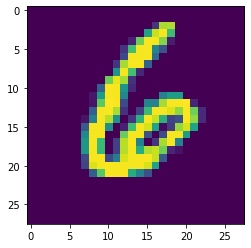

In [42]:
plt.imshow(np.reshape(x_train[13:14],(28,28)))